In [1]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [2]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv
from pathlib import Path
from MCForecastTools import MCSimulation


#For Heatmap:
import seaborn as sns
%matplotlib inline

In [3]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
#reading in csv data
df_2021 = pd.read_csv(
    Path('2021_data.csv')
).set_index('Month')

In [4]:
# View the dataframe
df_2021.describe()

,price_open,price_close,volume_traded,price_open.1,price_close.1,volume_traded.1,price_open.2,price_close.2,volume_traded.2,price_open.3,...,volume_traded.9,price_open.10,price_close.10,volume_traded.10,price_open.11,price_close.11,volume_traded.11,price_open.12,price_close.12,volume_traded.12
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,...,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000
mean,28143.358333,29573.258333,122952.069532,1306.971667,1513.715833,1.975279e+06,113.718333,118.095833,1.680011e+06,0.736251,...,248328.969200,0.011080,0.012388,4.522579e+09,0.667183,0.667125,2.295761e+09,120.730333,128.193000,221831.200443
std,22588.165003,23180.297716,118445.180264,1132.317010,1240.248479,2.013149e+06,92.443205,94.217980,1.689729e+06,0.695731,...,233779.224627,0.012556,0.012476,4.469727e+09,0.492748,0.492705,2.071428e+09,105.876402,107.481511,236244.455188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,34096.100000,36175.000000,123646.115750,1367.745000,1670.795000,1.766083e+06,136.845000,144.300000,1.334144e+06,0.768830,...,240541.734400,0.008545,0.011470,4.366915e+09,1.000300,1.000350,2.359378e+09,123.899000,154.570000,176929.537250
75%,42433.825000,45460.800000,197260.234225,2340.850000,2574.320000,2.856258e+06,171.125000,179.795000,3.181442e+06,1.328704,...,433347.464875,0.015705,0.018100,6.658610e+09,1.000875,1.000725,3.452073e+09,197.295250,197.283000,378695.617000
max,58780.400000,58786.200000,359063.137600,2776.470000,3219.950000,5.912135e+06,271.520000,271.550000,4.147055e+06,1.740000,...,641654.605300,0.040750,0.040770,1.242713e+10,1.001600,1.001600,6.342791e+09,319.804000,320.197000,619023.179100


In [5]:
# Clean the dataframe to only include the closing price
final_2021_df = pd.DataFrame()
final_2021_df['BTC_Monthly_Close'] = df_2021['price_close']
final_2021_df['ETH_Monthly_Close'] = df_2021['price_close.1']
final_2021_df['LTC_Monthly_Close'] = df_2021['price_close.2']
final_2021_df['ADA_Monthly_Close'] = df_2021['price_close.3']
final_2021_df['XLM_Monthly_Close'] = df_2021['price_close.4']
final_2021_df['XRP_Monthly_Close'] = df_2021['price_close.5']
final_2021_df['LISK_Monthly_Close'] = df_2021['price_close.6']
final_2021_df['WAVES_Monthly_Close'] = df_2021['price_close.7']
final_2021_df['ZEC_Monthly_Close'] = df_2021['price_close.8']
final_2021_df['SC_Monthly_Close'] = df_2021['price_close.9']
final_2021_df['USDT_Monthly_Close'] = df_2021['price_close.10']
final_2021_df['DASH_Monthly_Close'] = df_2021['price_close.11']
final_2021_df['DOGE_Monthly_Close'] = df_2021['price_close.12']

final_2021_df

,BTC_Monthly_Close,ETH_Monthly_Close,LTC_Monthly_Close,ADA_Monthly_Close,XLM_Monthly_Close,XRP_Monthly_Close,LISK_Monthly_Close,WAVES_Monthly_Close,ZEC_Monthly_Close,SC_Monthly_Close,USDT_Monthly_Close,DASH_Monthly_Close,DOGE_Monthly_Close
Month,,,,,,,,,,,,,
January,33122.0,1313.70,129.68,0.345201,0.037000,0.307000,0.49561,1.322039,6.5927,85.61,0.00740,1.0008,102.245
February,45245.4,1422.70,165.39,1.315604,0.048255,0.406000,0.41661,2.912001,8.8705,111.34,0.00964,1.0016,197.113
March,58786.2,1918.89,196.81,1.192370,0.053829,0.405683,0.56954,6.240000,11.9979,158.36,0.02585,1.0004,222.759
April,57780.0,2776.47,271.55,1.354226,0.338456,0.529969,1.60042,5.449347,23.3121,245.63,0.04077,1.0011,320.197
May,37303.8,2705.69,188.09,1.740000,0.325874,0.402200,1.04118,3.555353,13.8872,162.41,0.01785,1.0003,197.793
June,35046.2,2276.66,144.17,1.384683,0.254286,0.284498,0.70304,2.671989,16.2969,131.01,0.01330,1.0002,145.400
July,41488.5,2530.53,144.43,1.318233,0.207632,0.284442,0.74644,3.222598,16.5839,111.18,0.01500,1.0007,163.740
August,46107.0,3219.95,177.03,1.845190,0.287418,0.346739,1.03152,4.161496,19.4199,141.23,0.01885,1.0004,189.069
September,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.00,0.00000,0.0000,0.000


In [6]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""
btc_2021_df = final_2021_df['BTC_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
btc_2021_df

Month
January     0.000000
February    0.366023
March       0.299275
April      -0.017116
May        -0.354382
June       -0.060519
July        0.183823
August      0.111320
Name: BTC_Monthly_Close, dtype: float64

In [7]:
eth_2021_df = final_2021_df['ETH_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
eth_2021_df

Month
January     0.000000
February    0.082972
March       0.348766
April       0.446915
May        -0.025493
June       -0.158566
July        0.111510
August      0.272441
Name: ETH_Monthly_Close, dtype: float64

In [8]:
ltc_2021_df = final_2021_df['LTC_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
ltc_2021_df

Month
January     0.000000
February    0.275370
March       0.189975
April       0.379757
May        -0.307347
June       -0.233505
July        0.001803
August      0.225715
Name: LTC_Monthly_Close, dtype: float64

In [9]:
ada_2021_df = final_2021_df['ADA_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
ada_2021_df

Month
January     0.000000
February    2.811125
March      -0.093671
April       0.135743
May         0.284867
June       -0.204205
July       -0.047989
August      0.399745
Name: ADA_Monthly_Close, dtype: float64

In [10]:
xlm_2021_df = final_2021_df['XLM_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
xlm_2021_df

Month
January     0.000000
February    0.304186
March       0.115518
April       5.287595
May        -0.037174
June       -0.219682
July       -0.183470
August      0.384267
Name: XLM_Monthly_Close, dtype: float64

In [11]:
xrp_2021_df = final_2021_df['XRP_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
xrp_2021_df

Month
January     0.000000
February    0.322476
March      -0.000781
April       0.306362
May        -0.241088
June       -0.292645
July       -0.000197
August      0.219015
Name: XRP_Monthly_Close, dtype: float64

In [12]:
lisk_2021_df = final_2021_df['LISK_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
lisk_2021_df

Month
January     0.000000
February   -0.159400
March       0.367082
April       1.810022
May        -0.349433
June       -0.324766
July        0.061732
August      0.381920
Name: LISK_Monthly_Close, dtype: float64

In [13]:
waves_2021_df = final_2021_df['WAVES_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
waves_2021_df

Month
January     0.000000
February    1.202659
March       1.142856
April      -0.126707
May        -0.347563
June       -0.248460
July        0.206067
August      0.291348
Name: WAVES_Monthly_Close, dtype: float64

In [14]:
zec_2021_df = final_2021_df['ZEC_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
zec_2021_df

Month
January     0.000000
February    0.345503
March       0.352562
April       0.943015
May        -0.404292
June        0.173519
July        0.017611
August      0.171009
Name: ZEC_Monthly_Close, dtype: float64

In [15]:
sc_2021_df = final_2021_df['SC_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
sc_2021_df

Month
January     0.000000
February    0.300549
March       0.422310
April       0.551086
May        -0.338802
June       -0.193338
July       -0.151362
August      0.270282
Name: SC_Monthly_Close, dtype: float64

In [16]:
usdt_2021_df = final_2021_df['USDT_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
usdt_2021_df

Month
January     0.000000
February    0.302703
March       1.681535
April       0.577176
May        -0.562178
June       -0.254902
July        0.127820
August      0.256667
Name: USDT_Monthly_Close, dtype: float64

In [17]:
dash_2021_df = final_2021_df['DASH_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
dash_2021_df

Month
January     0.000000
February    0.000799
March      -0.001198
April       0.000700
May        -0.000799
June       -0.000100
July        0.000500
August     -0.000300
Name: DASH_Monthly_Close, dtype: float64

In [18]:
doge_2021_df = final_2021_df['BTC_Monthly_Close'].drop(
    labels=['September', 'October', 'November', 'December']).pct_change().fillna(0)
doge_2021_df

Month
January     0.000000
February    0.366023
March       0.299275
April      -0.017116
May        -0.354382
June       -0.060519
July        0.183823
August      0.111320
Name: BTC_Monthly_Close, dtype: float64

In [19]:
# Step 4: Calculate the variance of bitcoin, in this case being used as a proxy for the market.
# assign to market variance value
market_var = btc_2021_df.var()
market_var

0.05205133511077541

In [20]:
btc_var = btc_2021_df.var()
btc_var

0.05205133511077541

In [21]:
eth_var = eth_2021_df.var()
eth_var

0.04218559061535752

In [22]:
ltc_var = ltc_2021_df.var()
ltc_var

0.06010352366627702

In [23]:
ada_var = ada_2021_df.var()
ada_var

0.9807374507117916

In [24]:
xlm_var = xlm_2021_df.var()
xlm_var

3.471918903247612

In [25]:
xrp_var = xrp_2021_df.var()
xrp_var

0.053903414827781944

In [26]:
lisk_var = lisk_2021_df.var()
lisk_var

0.487763767002015

In [27]:
waves_var = waves_2021_df.var()
waves_var

0.35950549275561716

In [28]:
zec_var = zec_2021_df.var()
zec_var

0.14807058915237215

In [29]:
sc_var = sc_2021_df.var()
sc_var

0.10398502136265218

In [30]:
usdt_var = usdt_2021_df.var()
usdt_var

0.4498674766799193

In [31]:
dash_var = dash_2021_df.var()
dash_var

5.04650302855165e-07

In [32]:
doge_var = doge_2021_df.var()
doge_var

0.05205133511077541

In [33]:
# STEP 5B: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""

mkt_2021_cov = btc_2021_df.cov(btc_2021_df)
mkt_2021_cov

0.05205133511077539

In [34]:
eth_2021_cov = eth_2021_df.cov(btc_2021_df)
eth_2021_cov

0.01790181861620817

In [35]:
ltc_2021_cov = ltc_2021_df.cov(btc_2021_df)
ltc_2021_cov

0.03778992119180765

In [36]:
ada_2021_cov = ada_2021_df.cov(btc_2021_df)
ada_2021_cov

0.10409127717173057

In [37]:
xlm_2021_cov = xlm_2021_df.cov(btc_2021_df)
xlm_2021_cov

-0.040336285837148836

In [38]:
xrp_2021_cov = xrp_2021_df.cov(btc_2021_df)
xrp_2021_cov

0.03133777073208078

In [39]:
lisk_2021_cov = lisk_2021_df.cov(btc_2021_df)
lisk_2021_cov

0.014262499121266764

In [40]:
waves_2021_cov = waves_2021_df.cov(btc_2021_df)
waves_2021_cov

0.12183878970412707

In [41]:
zec_2021_cov = zec_2021_df.cov(btc_2021_df)
zec_2021_cov

0.037895277282204286

In [42]:
sc_2021_cov = sc_2021_df.cov(btc_2021_df)
sc_2021_cov

0.04344837382035444

In [43]:
usdt_2021_cov = usdt_2021_df.cov(btc_2021_df)
usdt_2021_cov

0.10432340802630805

In [44]:
dash_2021_cov = dash_2021_df.cov(btc_2021_df)
dash_2021_cov

4.230061616540932e-05

In [45]:
doge_2021_cov = doge_2021_df.cov(btc_2021_df)
doge_2021_cov

0.05205133511077539

In [46]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""
btc_beta_2021 = mkt_2021_cov / market_var
btc_beta_2021

0.9999999999999998

In [47]:
eth_beta_2021 = eth_2021_cov / market_var
eth_beta_2021

0.34392621395992257

In [48]:
ltc_beta_2021 = ltc_2021_cov / market_var
ltc_beta_2021

0.726012524201028

In [49]:
ada_beta_2021 = ada_2021_cov / market_var
ada_beta_2021

1.9997811189704164

In [50]:
xlm_beta_2021 = xlm_2021_cov / market_var
xlm_beta_2021

-0.7749327803274467

In [51]:
xrp_beta_2021 = xrp_2021_cov / market_var
xrp_beta_2021

0.6020550801509295

In [52]:
lisk_beta_2021 = lisk_2021_cov / market_var
lisk_beta_2021

0.2740083244918383

In [53]:
waves_beta_2021 = waves_2021_cov / market_var
waves_beta_2021

2.340742834834694

In [54]:
zec_beta_2021 = zec_2021_cov / market_var
zec_beta_2021

0.7280366046626034

In [55]:
sc_beta_2021 = sc_2021_cov / market_var
sc_beta_2021

0.8347216018165109

In [56]:
usdt_beta_2021 = usdt_2021_cov / market_var
usdt_beta_2021

2.004240771236462

In [57]:
dash_beta_2021 = dash_2021_cov / market_var
dash_beta_2021

0.0008126711077705374

In [58]:
doge_beta_2021 = doge_2021_cov / market_var
doge_beta_2021

0.9999999999999998

<AxesSubplot:>

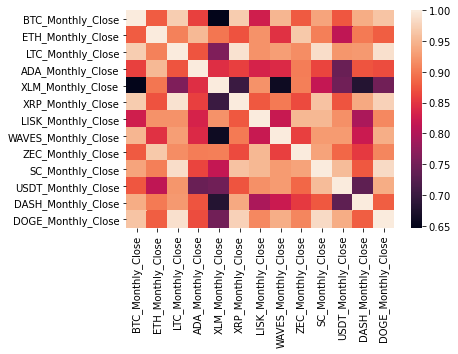

In [59]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""
correlation = final_2021_df.corr()
sns.heatmap(correlation)

In [70]:
trading_days = 122

In [73]:
# # Monte Carlo Simulation for remaining 4 months.
four_month_sim = MCSimulation(
    portfolio_data=final_2021_df,
    weights=[0.25, 0.25, 0.5],
    num_simulation=500,
    num_trading_days = 'trading_days',
)



IndexError: Too many levels: Index has only 1 level, not 2